# Brasileirão - 2006 a 2023
>Análises estatísticas dos campeonatos brasileiros na era dos pontos corridos, com 20 times e 38 rodadas.

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Dataprep

In [2]:
#fonte de dados entre 2003 e 2023 (até rodada 25): https://basedosdados.org/dataset/c861330e-bca2-474d-9073-bc70744a1b23?table=18835b0d-233e-4857-b454-1fa34a81b4fa
#fonte de dados 2023 (rodada 27 a 38): https://footystats.org/pt/brazil/serie-a/fixtures

#GoogleColab
# df_raw1 = pd.read_csv('/content/drive/MyDrive/Data Science/Brasileirao/dados/brasileirao2003_2023_rodada01_26.csv')

#Localhost
df_raw1 = pd.read_csv('../dados/brasileirao2003_2023_rodada01_26.csv')
df_raw1 = df_raw1.loc[df_raw1.ano_campeonato >= 2006]


#excluindo rodada 26 de 2023 pois foram encontrados erros na base em relação aos jogos de Cuiabá e Cruzeiro
df_raw1 = df_raw1.loc[~((df_raw1.ano_campeonato == 2023) & (df_raw1.rodada == 26)) ]
display(df_raw1.head())

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,tecnico_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante,gols_1_tempo_mandante,gols_1_tempo_visitante,escanteios_mandante,escanteios_visitante,faltas_mandante,faltas_visitante,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2015,2015-05-10,1,Arena do Grêmio,Héber Lopes,11920.0,60540.0,Grêmio,Ponte Preta,Luiz Felipe Scolari,Guto Ferreira,7.0,8.0,28250000.0,8350000.0,24.7,26.8,3.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,2015-05-24,3,Arena do Grêmio,Luiz Flávio de Oliveira,8336.0,60540.0,Grêmio,Figueirense FC,James Freitas,Argel Fucks,18.0,19.0,26000000.0,7950000.0,26.1,25.6,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,2015-06-04,5,Arena do Grêmio,Wilton Sampaio,20231.0,60540.0,Grêmio,Corinthians,Roger Machado,Tite,13.0,8.0,28500000.0,33250000.0,24.6,28.0,3.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,2015-06-14,7,Arena do Grêmio,Marcos André Gomes da Penha,19625.0,60540.0,Grêmio,Atlético-PR,Roger Machado,Milton Mendes,12.0,1.0,28250000.0,14750000.0,25.8,25.1,2.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,2015-06-21,8,Arena do Grêmio,Raphael Claus,20814.0,60540.0,Grêmio,Palmeiras,Roger Machado,Marcelo Oliveira,7.0,11.0,28250000.0,30250000.0,25.8,28.4,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dados nulos

In [3]:
df_raw1.isna().sum()/df_raw1.shape[0]

ano_campeonato                    0.000000
data                              0.000000
rodada                            0.000000
estadio                           0.001639
arbitro                           0.056632
publico                           0.056781
publico_max                       0.436662
time_mandante                     0.000000
time_visitante                    0.000000
tecnico_mandante                  0.122653
tecnico_visitante                 0.122653
colocacao_mandante                0.056632
colocacao_visitante               0.056632
valor_equipe_titular_mandante     0.114456
valor_equipe_titular_visitante    0.114456
idade_media_titular_mandante      0.114754
idade_media_titular_visitante     0.114754
gols_mandante                     0.000149
gols_visitante                    0.000149
gols_1_tempo_mandante             0.058122
gols_1_tempo_visitante            0.058122
escanteios_mandante               0.739344
escanteios_visitante              0.739344
faltas_mand

# Seleção de features
>Seleção das features com menos de 1% de dados faltantes

In [18]:
df_raw1.loc[(df_raw1.ano_campeonato==2006) & ((df_raw1.time_mandante== 'Corinthians') | (df_raw1.time_visitante== 'Corinthians'))].sort_values('rodada')[['ano_campeonato','data','rodada','time_mandante','time_visitante','gols_mandante','gols_visitante']]

,ano_campeonato,data,rodada,time_mandante,time_visitante,gols_mandante,gols_visitante
6212,2006,2006-04-16,1,Grêmio,Corinthians,2.0,0.0
6218,2006,2006-04-23,2,Corinthians,São Caetano,3.0,0.0
6483,2006,2006-04-30,3,Fortaleza,Corinthians,0.0,4.0
6434,2006,2006-05-07,4,Ponte Preta,Corinthians,3.0,2.0
6468,2006,2006-05-14,5,Corinthians,São Paulo,1.0,3.0
6443,2006,2006-05-25,7,Paraná,Corinthians,1.0,2.0
6487,2006,2006-05-28,8,Vasco da Gama,Corinthians,2.0,4.0
6374,2006,2006-06-03,10,Corinthians,Internacional,0.0,1.0
6241,2006,2006-06-04,10,Santos FC,Corinthians,2.0,0.0
6113,2006,2006-07-12,11,Corinthians,Santa Cruz,1.0,0.0


In [4]:
cols_validas = pd.DataFrame(df_raw1.isna().sum()/df_raw1.shape[0]).reset_index()
cols_validas = cols_validas.loc[cols_validas[0] <= 0.01]['index'].tolist()
cols_validas

['ano_campeonato',
 'data',
 'rodada',
 'estadio',
 'time_mandante',
 'time_visitante',
 'gols_mandante',
 'gols_visitante']

In [5]:
#drop feature "data" e "estadio" por não agregarem valor ao tipo de análise proposta
cols_validas.remove('data')
cols_validas.remove('estadio')
cols_validas

['ano_campeonato',
 'rodada',
 'time_mandante',
 'time_visitante',
 'gols_mandante',
 'gols_visitante']

In [6]:
df_raw1 = df_raw1[cols_validas]
df_raw1 = df_raw1.sort_values(['ano_campeonato','rodada']).reset_index(drop = True)
df_raw1

,ano_campeonato,rodada,time_mandante,time_visitante,gols_mandante,gols_visitante
0,2006,1,Juventude,Paraná,1.0,0.0
1,2006,1,Internacional,Juventude,1.0,0.0
2,2006,1,Grêmio,Corinthians,2.0,0.0
3,2006,1,São Paulo,Flamengo,1.0,0.0
4,2006,1,Botafogo,Fortaleza,1.0,0.0
...,...,...,...,...,...,...
6705,2023,25,Cruzeiro,América-MG,1.0,1.0
6706,2023,25,Fortaleza,Grêmio,1.0,1.0
6707,2023,25,São Paulo,Corinthians,2.0,1.0
6708,2023,25,RB Bragantino,Palmeiras,2.0,1.0


In [7]:
df_raw1.groupby('ano_campeonato')['rodada'].max()

ano_campeonato
2006    38
2007    38
2008    38
2009    38
2010    38
2011    38
2012    38
2013    38
2014    38
2015    38
2016    38
2017    38
2018    38
2019    38
2020    38
2021    38
2022    38
2023    25
Name: rodada, dtype: int64

# Adicionando rodadas 26 a 38 do ano 2023

In [8]:
df_raw2 = pd.read_csv('../dados/brasileirao2023_rodada26_38.csv')
display(df_raw2.tail())

,ano_campeonato,rodada,time_mandante,time_visitante,gols_mandante,gols_visitante
125,2023,38,Cruzeiro,Palmeiras,1,1
126,2023,38,Internacional,Botafogo,3,1
127,2023,38,Coritiba FC,Corinthians,0,2
128,2023,38,EC Bahia,Atlético-MG,4,1
129,2023,38,Cuiabá-MT,Atlético-PR,3,0


# Concatenando os df's

In [9]:
df = pd.concat([df_raw1, df_raw2])
df

,ano_campeonato,rodada,time_mandante,time_visitante,gols_mandante,gols_visitante
0,2006,1,Juventude,Paraná,1.0,0.0
1,2006,1,Internacional,Juventude,1.0,0.0
2,2006,1,Grêmio,Corinthians,2.0,0.0
3,2006,1,São Paulo,Flamengo,1.0,0.0
4,2006,1,Botafogo,Fortaleza,1.0,0.0
...,...,...,...,...,...,...
125,2023,38,Cruzeiro,Palmeiras,1.0,1.0
126,2023,38,Internacional,Botafogo,3.0,1.0
127,2023,38,Coritiba FC,Corinthians,0.0,2.0
128,2023,38,EC Bahia,Atlético-MG,4.0,1.0


# Unificando nomes de times similares

In [10]:
lista_times = df.time_mandante.unique().tolist()
for time in  df.time_visitante.unique():
  if time not in lista_times:
    lista_times.append(time)

lista_times.sort()

display(len(lista_times))
lista_times

45

['América-MG',
 'América-RN',
 'Athletico-PR',
 'Atlético-GO',
 'Atlético-MG',
 'Atlético-PR',
 'Avaí FC',
 'Barueri',
 'Botafogo',
 'CSA',
 'Ceará SC',
 'Chapecoense',
 'Corinthians',
 'Coritiba FC',
 'Criciúma EC',
 'Cruzeiro',
 'Cuiabá-MT',
 'EC Bahia',
 'EC Vitória',
 'Figueirense FC',
 'Flamengo',
 'Fluminense',
 'Fortaleza',
 'Goiás',
 'Goiás EC',
 'Grêmio',
 'Guarani',
 'Internacional',
 'Ipatinga FC',
 'Joinville-SC',
 'Juventude',
 'Náutico',
 'Palmeiras',
 'Paraná',
 'Ponte Preta',
 'Portuguesa',
 'RB Bragantino',
 'Santa Cruz',
 'Santo André',
 'Santos',
 'Santos FC',
 'Sport Recife',
 'São Caetano',
 'São Paulo',
 'Vasco da Gama']

In [11]:
dict_times = {'Athletico-PR' : 'Atlético-PR',
              'Goiás EC' : 'Goiás',
              'Santos FC' : 'Santos'}

df['time_mandante'].replace(dict_times, inplace = True)
df['time_visitante'].replace(dict_times, inplace = True)

display(np.sort(df['time_mandante'].unique()))
display(np.sort(df['time_visitante'].unique()))

array(['América-MG', 'América-RN', 'Atlético-GO', 'Atlético-MG',
       'Atlético-PR', 'Avaí FC', 'Barueri', 'Botafogo', 'CSA', 'Ceará SC',
       'Chapecoense', 'Corinthians', 'Coritiba FC', 'Criciúma EC',
       'Cruzeiro', 'Cuiabá-MT', 'EC Bahia', 'EC Vitória',
       'Figueirense FC', 'Flamengo', 'Fluminense', 'Fortaleza', 'Goiás',
       'Grêmio', 'Guarani', 'Internacional', 'Ipatinga FC',
       'Joinville-SC', 'Juventude', 'Náutico', 'Palmeiras', 'Paraná',
       'Ponte Preta', 'Portuguesa', 'RB Bragantino', 'Santa Cruz',
       'Santo André', 'Santos', 'Sport Recife', 'São Caetano',
       'São Paulo', 'Vasco da Gama'], dtype=object)

array(['América-MG', 'América-RN', 'Atlético-GO', 'Atlético-MG',
       'Atlético-PR', 'Avaí FC', 'Barueri', 'Botafogo', 'CSA', 'Ceará SC',
       'Chapecoense', 'Corinthians', 'Coritiba FC', 'Criciúma EC',
       'Cruzeiro', 'Cuiabá-MT', 'EC Bahia', 'EC Vitória',
       'Figueirense FC', 'Flamengo', 'Fluminense', 'Fortaleza', 'Goiás',
       'Grêmio', 'Guarani', 'Internacional', 'Ipatinga FC',
       'Joinville-SC', 'Juventude', 'Náutico', 'Palmeiras', 'Paraná',
       'Ponte Preta', 'Portuguesa', 'RB Bragantino', 'Santa Cruz',
       'Santo André', 'Santos', 'Sport Recife', 'São Caetano',
       'São Paulo', 'Vasco da Gama'], dtype=object)

# Estatística básica

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ano_campeonato,6840.0,2014.500000,5.188507,2006.0,2010.0,2014.5,2019.0,2023.0
rodada,6840.0,19.500000,10.966658,1.0,10.0,19.5,29.0,38.0
gols_mandante,6839.0,1.489838,1.197580,0.0,1.0,1.0,2.0,7.0
gols_visitante,6839.0,0.997368,1.005975,0.0,0.0,1.0,2.0,7.0


# Testes de consistência dos dados - Parte 1

In [13]:
#rodadas por temporada: esperadas 38
df.groupby('ano_campeonato')['rodada'].max()

ano_campeonato
2006    38
2007    38
2008    38
2009    38
2010    38
2011    38
2012    38
2013    38
2014    38
2015    38
2016    38
2017    38
2018    38
2019    38
2020    38
2021    38
2022    38
2023    38
Name: rodada, dtype: int64

In [14]:
#jogos como mandante por time por temporada: esperados 19 jogos
df_jogos_por_time_mandante = df.groupby(['ano_campeonato','time_mandante'])['rodada'].count().reset_index()
display('Jogos por time como mandantes, diferente de 19 jogos:',df_jogos_por_time_mandante.loc[df_jogos_por_time_mandante.rodada!=19])

#jogos como visitante por time por temporada: esperados 19 jogos
df_jogos_por_time_visitante = df.groupby(['ano_campeonato','time_visitante'])['rodada'].count().reset_index()
display('Jogos por time como visitante, diferente de 19 jogos:',df_jogos_por_time_visitante.loc[df_jogos_por_time_visitante.rodada!=19])

# Diferenças encontradas no ano 2006 para os 4 times indicam que houve apenas uma inversão entre mandante e visitante, mas todos realizaram 38 jogos, e assim não implicará em prejuízos para a análise

'Jogos por time como mandantes, diferente de 19 jogos:'

,ano_campeonato,time_mandante,rodada
2,2006,Corinthians,18
3,2006,Cruzeiro,20
8,2006,Goiás,20
10,2006,Internacional,18


'Jogos por time como visitante, diferente de 19 jogos:'

,ano_campeonato,time_visitante,rodada
2,2006,Corinthians,20
3,2006,Cruzeiro,18
8,2006,Goiás,18
10,2006,Internacional,20


# Engenharia de features

In [15]:
df['pontos_mandante'] = df.gols_mandante - df.gols_visitante
df['pontos_mandante'] = df['pontos_mandante'].map(lambda x: 3 if x > 0 else 1 if x == 0 else 0)

df['pontos_visitante'] = df.gols_visitante - df.gols_mandante
df['pontos_visitante'] = df['pontos_visitante'].map(lambda x: 3 if x > 0 else 1 if x == 0 else 0)

df

,ano_campeonato,rodada,time_mandante,time_visitante,gols_mandante,gols_visitante,pontos_mandante,pontos_visitante
0,2006,1,Juventude,Paraná,1.0,0.0,3,0
1,2006,1,Internacional,Juventude,1.0,0.0,3,0
2,2006,1,Grêmio,Corinthians,2.0,0.0,3,0
3,2006,1,São Paulo,Flamengo,1.0,0.0,3,0
4,2006,1,Botafogo,Fortaleza,1.0,0.0,3,0
...,...,...,...,...,...,...,...,...
125,2023,38,Cruzeiro,Palmeiras,1.0,1.0,1,1
126,2023,38,Internacional,Botafogo,3.0,1.0,3,0
127,2023,38,Coritiba FC,Corinthians,0.0,2.0,0,3
128,2023,38,EC Bahia,Atlético-MG,4.0,1.0,3,0


In [16]:
#criação de df_mandante e df_visitante para depois concatená-los

#df_mandante
df_mandante = df[['ano_campeonato',	'rodada',	'time_mandante','time_visitante','gols_mandante','gols_visitante']].copy()
df_mandante.rename(columns = {'time_mandante':'time',
                              'time_visitante':'adversário',
                              'gols_mandante':'gols_pro',
                              'gols_visitante': 'gols_contra'}, inplace = True)
df_mandante['pontos'] = df_mandante.gols_pro - df_mandante.gols_contra
df_mandante['pontos'] = df_mandante['pontos'].map(lambda x: 3 if x > 0 else 1 if x == 0 else 0)

#df_visitante
df_visitante = df[['ano_campeonato',	'rodada',	'time_visitante','time_mandante','gols_mandante','gols_visitante']].copy()
df_visitante.rename(columns = {'time_visitante':'time',
                               'time_mandante': 'adversário',
                              'gols_visitante':'gols_pro',
                              'gols_mandante': 'gols_contra'
                              }, inplace = True)

df_visitante['pontos'] = df_visitante.gols_pro - df_visitante.gols_contra
df_visitante['pontos'] = df_visitante['pontos'].map(lambda x: 3 if x > 0 else 1 if x == 0 else 0)

df_concat = pd.concat([df_mandante, df_visitante]).reset_index(drop = True)

#criação das features vitoria, empate, derrota
df_concat['vitoria'] = df_concat['pontos'].map(lambda x: 1 if x == 3 else 0)
df_concat['derrota'] = df_concat['pontos'].map(lambda x: 1 if x == 0 else 0)
df_concat['empate'] = df_concat['pontos'].map(lambda x: 1 if x == 1 else 0)
df_concat

,ano_campeonato,rodada,time,adversário,gols_pro,gols_contra,pontos,vitoria,derrota,empate
0,2006,1,Juventude,Paraná,1.0,0.0,3,1,0,0
1,2006,1,Internacional,Juventude,1.0,0.0,3,1,0,0
2,2006,1,Grêmio,Corinthians,2.0,0.0,3,1,0,0
3,2006,1,São Paulo,Flamengo,1.0,0.0,3,1,0,0
4,2006,1,Botafogo,Fortaleza,1.0,0.0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
13675,2023,38,Palmeiras,Cruzeiro,1.0,1.0,1,0,0,1
13676,2023,38,Botafogo,Internacional,1.0,3.0,0,0,1,0
13677,2023,38,Corinthians,Coritiba FC,2.0,0.0,3,1,0,0
13678,2023,38,Atlético-MG,EC Bahia,1.0,4.0,0,0,1,0


# Testes de consistência dos dados - Parte 2

In [17]:
#jogos por temporada: esperados 38 por time (OK)
display(df_concat.groupby(['time','ano_campeonato'])['rodada'].count())
df_concat.groupby(['time','ano_campeonato'])['rodada'].count().describe()

time           ano_campeonato
América-MG     2011              38
               2016              38
               2018              38
               2021              38
               2022              38
                                 ..
Vasco da Gama  2017              38
               2018              38
               2019              38
               2020              38
               2023              38
Name: rodada, Length: 360, dtype: int64

count    360.0
mean      38.0
std        0.0
min       38.0
25%       38.0
50%       38.0
75%       38.0
max       38.0
Name: rodada, dtype: float64

# EDA
>Análise Exploratória de Dados

In [18]:
df_concat

,ano_campeonato,rodada,time,adversário,gols_pro,gols_contra,pontos,vitoria,derrota,empate
0,2006,1,Juventude,Paraná,1.0,0.0,3,1,0,0
1,2006,1,Internacional,Juventude,1.0,0.0,3,1,0,0
2,2006,1,Grêmio,Corinthians,2.0,0.0,3,1,0,0
3,2006,1,São Paulo,Flamengo,1.0,0.0,3,1,0,0
4,2006,1,Botafogo,Fortaleza,1.0,0.0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
13675,2023,38,Palmeiras,Cruzeiro,1.0,1.0,1,0,0,1
13676,2023,38,Botafogo,Internacional,1.0,3.0,0,0,1,0
13677,2023,38,Corinthians,Coritiba FC,2.0,0.0,3,1,0,0
13678,2023,38,Atlético-MG,EC Bahia,1.0,4.0,0,0,1,0


In [19]:
df_cumsum = df_concat.sort_values(['ano_campeonato','time','rodada']).copy()
df_cumsum['pontos_acum'] = df_cumsum.groupby(['time','ano_campeonato'])['pontos'].cumsum()
df_cumsum['vitorias_acum'] = df_cumsum.groupby(['time','ano_campeonato'])['vitoria'].cumsum()
df_cumsum['empates_acum'] = df_cumsum.groupby(['time','ano_campeonato'])['empate'].cumsum()
df_cumsum['derrotas_acum'] = df_cumsum.groupby(['time','ano_campeonato'])['derrota'].cumsum()
df_cumsum['gols_pro_acum'] = df_cumsum.groupby(['time','ano_campeonato'])['gols_pro'].cumsum()
df_cumsum['gols_contra_acum'] = df_cumsum.groupby(['time','ano_campeonato'])['gols_contra'].cumsum()
df_cumsum['saldo_gols_acum'] = df_cumsum['gols_pro_acum'] - df_cumsum['gols_contra_acum']
df_cumsum

,ano_campeonato,rodada,time,adversário,gols_pro,gols_contra,pontos,vitoria,derrota,empate,pontos_acum,vitorias_acum,empates_acum,derrotas_acum,gols_pro_acum,gols_contra_acum,saldo_gols_acum
11,2006,2,Atlético-PR,Paraná,4.0,0.0,3,1,0,0,3,1,0,0,4.0,0.0,4.0
16,2006,2,Atlético-PR,Fluminense,1.0,2.0,0,0,1,0,3,1,0,1,5.0,2.0,3.0
6861,2006,3,Atlético-PR,Santos,0.0,2.0,0,0,1,0,3,1,0,2,5.0,4.0,1.0
6879,2006,4,Atlético-PR,Botafogo,4.0,0.0,3,1,0,0,6,2,0,2,9.0,4.0,5.0
49,2006,5,Atlético-PR,Vasco da Gama,6.0,4.0,3,1,0,0,9,3,0,2,15.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6791,2023,34,Vasco da Gama,América-MG,2.0,1.0,3,1,0,0,41,11,8,15,37.0,45.0,-8.0
13647,2023,35,Vasco da Gama,Atlético-PR,0.0,0.0,1,0,0,1,42,11,9,15,37.0,45.0,-8.0
6811,2023,36,Vasco da Gama,Corinthians,2.0,4.0,0,0,1,0,42,11,9,16,39.0,49.0,-10.0
13666,2023,37,Vasco da Gama,Grêmio,0.0,1.0,0,0,1,0,42,11,9,17,39.0,50.0,-11.0


In [20]:
#Comparativo entre todos os times por temporada
filtro_ano = 2022
filtro_time = 'Corinthians'
plt.figure(figsize = (20,7))
df_ano = df_cumsum.loc[df_cumsum.ano_campeonato == filtro_ano]
fig = px.line(df_ano, x ='rodada', y = 'pontos_acum', color = 'time', title = f'Brasileirão {filtro_ano}')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

<Figure size 2000x700 with 0 Axes>

## Evolução por rodada

In [21]:
#Comparativo entre todos os times por temporada
filtro_ano1 = 2022
filtro_ano2 = 2023

plt.figure(figsize = (20,7))
df_ano = df_cumsum.loc[(df_cumsum.ano_campeonato == filtro_ano1) | (df_cumsum.ano_campeonato == filtro_ano2) ]
fig = px.line(df_ano, x ='rodada', y = 'pontos_acum', color = 'time', facet_col= 'ano_campeonato', title = f'Brasileirão | Comparativo')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

<Figure size 2000x700 with 0 Axes>

# Identificando os campeões de cada ano

In [22]:
#identificando os campeões de cada ano
'''
Critérios de desempate do Brasileirão
1º maior número de vitórias.
2º maior saldo de gols.
3º maior número de gols pró
'''
# dados na útlima rodada
df_rodada38 = df_cumsum.loc[df_cumsum.rodada == 38]
df_rodada38 = df_rodada38.sort_values(['ano_campeonato','pontos_acum','vitorias_acum', 'saldo_gols_acum','gols_pro_acum'])

#classificacao por ano
list_anos = df_rodada38.ano_campeonato.unique()
list_df_classificacao = []
for ano in list_anos:
    df_temp = df_rodada38.loc[df_rodada38.ano_campeonato == ano][['ano_campeonato','time']]
    df_temp['classificacao'] = np.arange(20,0,-1)
    list_df_classificacao.append(df_temp)
df_classificacao_ano = pd.concat(list_df_classificacao)

df_completo = df_cumsum.merge(df_classificacao_ano, on = ['ano_campeonato','time'], how = 'left')
df_completo.to_parquet('../dados/df_completo.parquet')
df_completo

,ano_campeonato,rodada,time,adversário,gols_pro,gols_contra,pontos,vitoria,derrota,empate,pontos_acum,vitorias_acum,empates_acum,derrotas_acum,gols_pro_acum,gols_contra_acum,saldo_gols_acum,classificacao
0,2006,2,Atlético-PR,Paraná,4.0,0.0,3,1,0,0,3,1,0,0,4.0,0.0,4.0,NaN
1,2006,2,Atlético-PR,Fluminense,1.0,2.0,0,0,1,0,3,1,0,1,5.0,2.0,3.0,NaN
2,2006,3,Atlético-PR,Santos,0.0,2.0,0,0,1,0,3,1,0,2,5.0,4.0,1.0,NaN
3,2006,4,Atlético-PR,Botafogo,4.0,0.0,3,1,0,0,6,2,0,2,9.0,4.0,5.0,NaN
4,2006,5,Atlético-PR,Vasco da Gama,6.0,4.0,3,1,0,0,9,3,0,2,15.0,8.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,2023,34,Vasco da Gama,América-MG,2.0,1.0,3,1,0,0,41,11,8,15,37.0,45.0,-8.0,15.0
13942,2023,35,Vasco da Gama,Atlético-PR,0.0,0.0,1,0,0,1,42,11,9,15,37.0,45.0,-8.0,15.0
13943,2023,36,Vasco da Gama,Corinthians,2.0,4.0,0,0,1,0,42,11,9,16,39.0,49.0,-10.0,15.0
13944,2023,37,Vasco da Gama,Grêmio,0.0,1.0,0,0,1,0,42,11,9,17,39.0,50.0,-11.0,15.0


In [23]:
#Comparativo entre os campeões desde 2006
plt.figure(figsize = (20,7))
df_plot = df_completo.loc[(df_completo.classificacao == 1) ]
fig = px.line(df_plot, x ='rodada', y = 'pontos_acum', color = 'ano_campeonato', title = f'Campeões dos Brasileirões', hover_name='time')
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

<Figure size 2000x700 with 0 Axes>

In [24]:
# Create distplot with curve_type set to 'normal'

group_labels = []
hist_data = []

for ano in df_rodada38.ano_campeonato.unique():
  group_labels.append(str(ano))
  df_ano = df_rodada38.loc[df_rodada38.ano_campeonato == ano]['pontos_acum'].tolist()
  hist_data.append(df_ano)

fig = ff.create_distplot(hist_data,group_labels, curve_type = 'normal', show_hist=False, show_rug = False)

# Add title
fig.update_layout(title_text='Curve and Rug Plot')
fig.show()

In [25]:
df_completo.groupby('ano_campeonato').pontos_acum.std()

ano_campeonato
2006    16.341651
2007    16.787801
2008    16.782919
2009    16.360315
2010    16.269261
2011    16.560927
2012    17.300102
2013    16.666530
2014    16.993274
2015    17.018150
2016    16.984054
2017    16.373840
2018    16.962331
2019    17.936313
2020    16.814262
2021    17.029766
2022    16.913201
2023    17.067857
Name: pontos_acum, dtype: float64

In [26]:
df_rodada38.groupby('ano_campeonato').pontos_acum.max()

ano_campeonato
2006    78
2007    77
2008    75
2009    67
2010    71
2011    71
2012    77
2013    76
2014    80
2015    81
2016    80
2017    72
2018    80
2019    90
2020    71
2021    84
2022    81
2023    70
Name: pontos_acum, dtype: int64

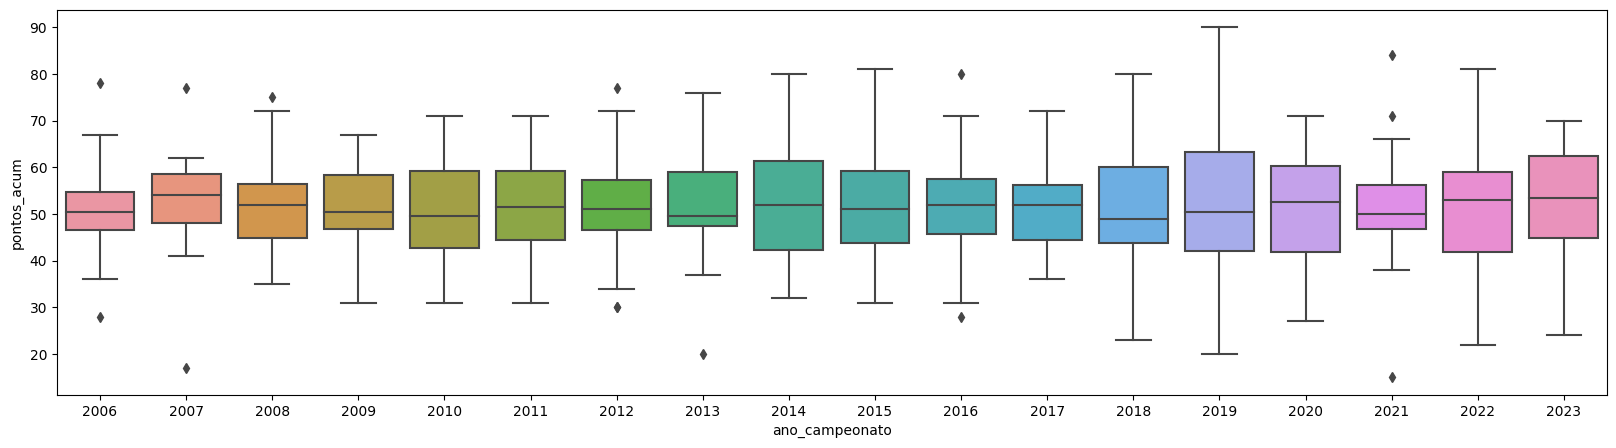

In [27]:
plt.figure(figsize = (20,5))
sns.boxplot(data = df_rodada38, x = 'ano_campeonato', y = 'pontos_acum');

In [28]:
#Comparativo entre todos os times por temporada
filtro_ano1 = 2022
filtro_ano2 = 2023
select_top = 6
select_last = 4

plt.figure(figsize = (20,7))
df_plot = df_completo.loc[((df_completo.ano_campeonato == filtro_ano1) | (df_completo.ano_campeonato == filtro_ano2)) & ((df_completo.classificacao <= select_top) | (df_completo.classificacao > 20 - select_top)) ]
fig = px.line(df_plot, x ='rodada', y = 'pontos_acum', color = 'time', facet_col= 'ano_campeonato', title = f'Brasileirão {filtro_ano}', hover_data=['classificacao'])
fig.add_vline(x=19, line_width=3, line_dash="dash", line_color="green")

<Figure size 2000x700 with 0 Axes>

# Zona de Rebaixamento

In [29]:
df_pontuacao_corte_rebaixamento = df_completo.loc[df_completo.classificacao == 17][['ano_campeonato', 'pontos_acum']]
display(df_pontuacao_corte_rebaixamento.tail(4))

df_pontuacao_g6 = df_completo.loc[df_completo.classificacao == 6][['ano_campeonato', 'pontos_acum']]
display(df_pontuacao_g6.tail(6))

,ano_campeonato,pontos_acum
13866,2023,43
13867,2023,43
13868,2023,43
13869,2023,43


,ano_campeonato,pontos_acum
13826,2023,58
13827,2023,59
13828,2023,59
13829,2023,59
13830,2023,62
13831,2023,62
